# National Health and Nutrition Examination Survey

### 2013 - 2014 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2013-2014
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/CBC_H.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_H.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count   9422.000000  8544.000000  8519.000000  8519.000000  8519.000000   
mean   78648.906602     7.379506    33.667261     8.191959    54.491572   
std     2934.341126     2.302574    10.584165     2.253287    11.388322   
min    73557.000000     2.300000     2.600000     1.300000     8.400000   
25%    76105.250000     5.800000    26.300000     6.700000    47.600000   
50%    78653.000000     7.100000    32.600000     7.900000    55.500000   
75%    81193.750000     8.600000    39.700000     9.400000    62.300000   
max    83731.000000    55.700000    88.000000    38.900000    92.500000   

           LBXEOPCT      LBXBAPCT     LBDLYMNO      LBDMONO      LBDNENO  ...  \
count  8.519000e+03  8.519000e+03  8519.000000  8519.000000  8519.000000  ...   
mean   2.987710e+00  7.158469e-01     2.433290     0.588602     4.094788  ...   
std    2.440243e+00  3.368711e-01     1.112916     0.200663     1.783057  ...   
min    5.397605e-79  5.397605e-79     0.200000     0.100000     0.400000  ...   
25%    1.500000e+00  5.000000e-01     1.800000     0.500000     2.900000  ...   
50%    2.300000e+00  6.000000e-01     2.200000     0.600000     3.800000  ...   
75%    3.700000e+00  9.000000e-01     2.800000     0.700000     4.900000  ...   
max    3.660000e+01  5.800000e+00    49.000000     3.400000    25.600000  ...   

            LBDBANO     LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI  \
count  8.519000e+03  8544.000000  8544.000000  8544.000000  8544.000000   
mean   4.440662e-02     4.659599    13.683169    40.441959    87.017170   
std    5.174914e-02     0.463964     1.487922     4.106112     6.466476   
min    5.397605e-79     1.670000     6.400000    17.900000    55.700000   
25%    5.397605e-79     4.360000    12.700000    37.700000    83.200000   
50%    5.397605e-79     4.640000    13.600000    40.200000    87.500000   
75%    1.000000e-01     4.950000    14.700000    43.200000    91.300000   
max    8.000000e-01     8.300000    19.500000    56.500000   115.300000   

          LBXMCHSI        LBXMC       LBXRDW     LBXPLTSI      LBXMPSI  
count  8544.000000  8544.000000  8544.000000  8544.000000  8544.000000  
mean     29.438635    33.809890    13.628921   251.195108     8.296653  
std       2.556528     1.035187     1.204282    66.054022     0.954857  
min      16.800000    28.000000    11.300000    18.000000     5.500000  
25%      28.100000    33.300000    12.900000   206.000000     7.600000  
50%      29.700000    33.800000    13.400000   244.000000     8.200000  
75%      31.100000    34.400000    14.000000   288.000000     8.900000  
max      74.500000    69.600000    30.600000   723.000000    13.600000  

[8 rows x 21 columns]

<Axes: >

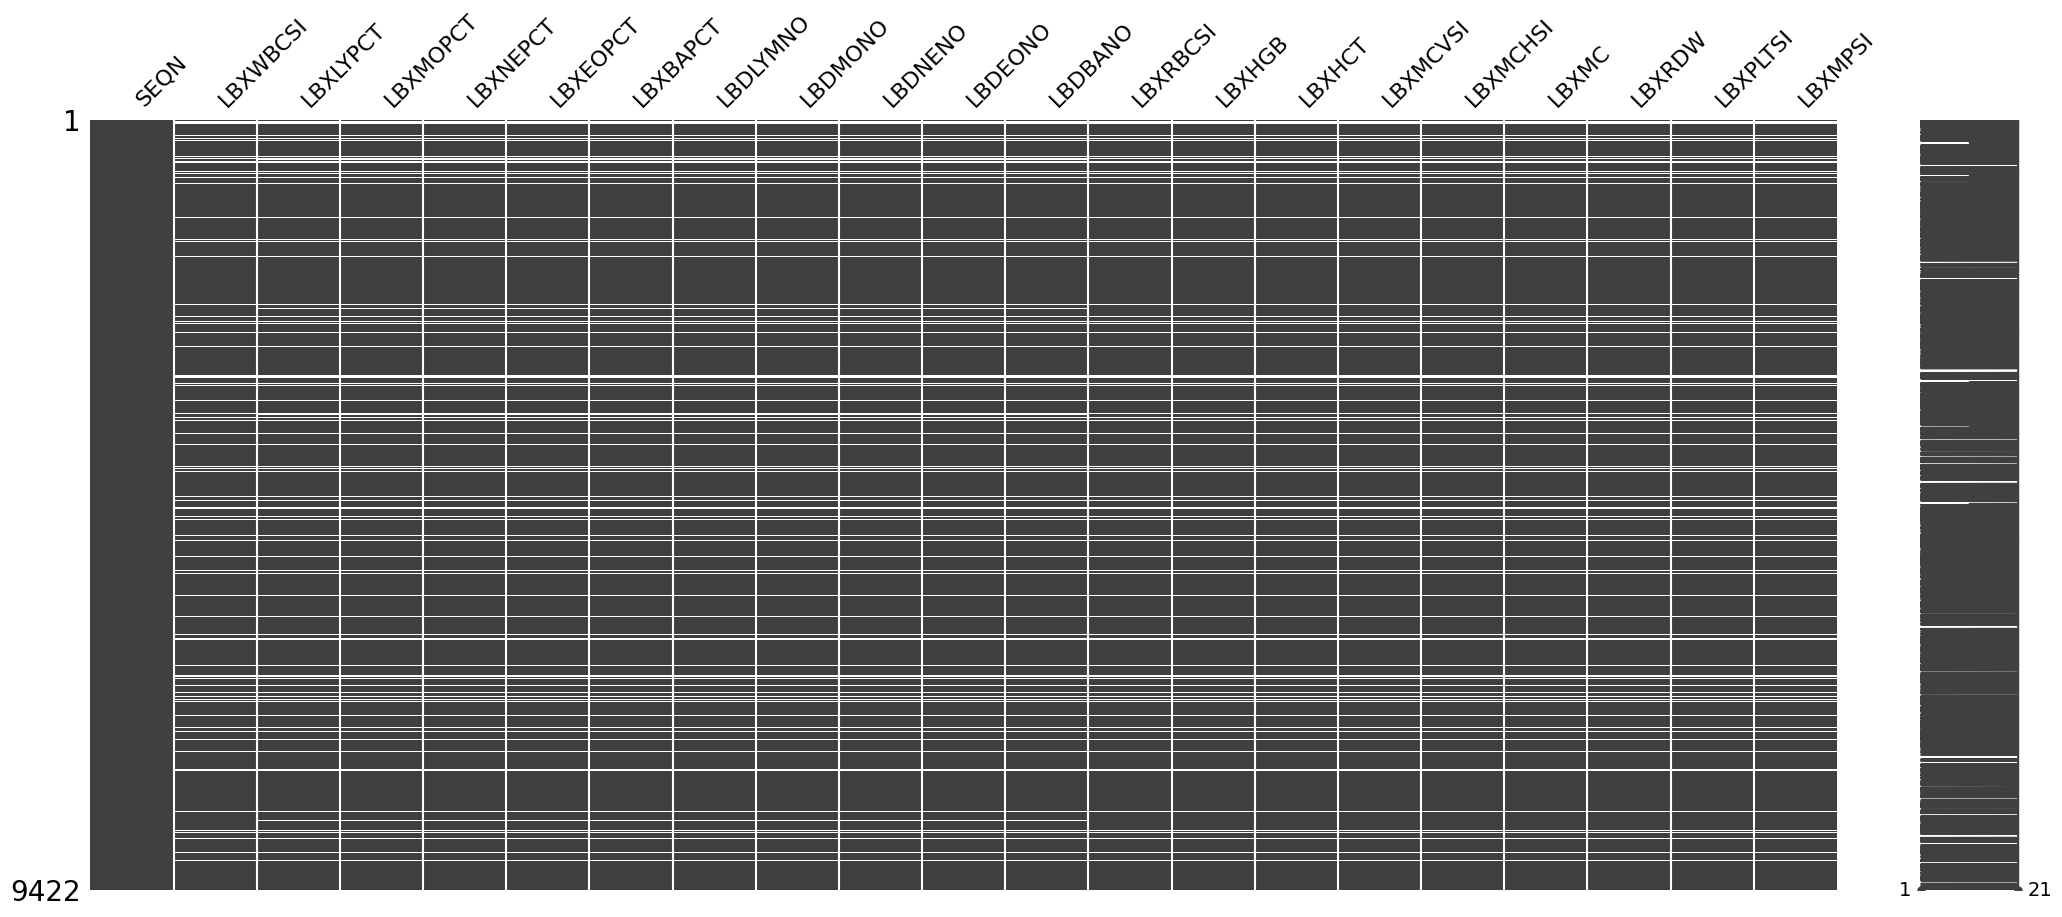

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
277   73860.0       4.6       NaN       NaN       NaN       NaN       NaN   
483   74082.0       3.9       NaN       NaN       NaN       NaN       NaN   
685   74301.0      10.8       NaN       NaN       NaN       NaN       NaN   
729   74346.0       6.9       NaN       NaN       NaN       NaN       NaN   
744   74364.0       6.9       NaN       NaN       NaN       NaN       NaN   
1772  75479.0       6.0       NaN       NaN       NaN       NaN       NaN   
2068  75796.0       5.5       NaN       NaN       NaN       NaN       NaN   
2138  75872.0       3.8       NaN       NaN       NaN       NaN       NaN   
2293  76040.0       6.3       NaN       NaN       NaN       NaN       NaN   
2306  76053.0       9.6       NaN       NaN       NaN       NaN       NaN   
3108  76927.0       4.9       NaN       NaN       NaN       NaN       NaN   
3209  77033.0       6.6       NaN       NaN       NaN       NaN       NaN   
3471  77310.0       6.2       NaN       NaN       NaN       NaN       NaN   
3577  77431.0      11.7       NaN       NaN       NaN       NaN       NaN   
3603  77457.0       6.9       NaN       NaN       NaN       NaN       NaN   
3761  77627.0       8.7       NaN       NaN       NaN       NaN       NaN   
4697  78637.0      11.4       NaN       NaN       NaN       NaN       NaN   
6789  80899.0       7.0       NaN       NaN       NaN       NaN       NaN   
6818  80928.0       7.6       NaN       NaN       NaN       NaN       NaN   
6975  81099.0       6.1       NaN       NaN       NaN       NaN       NaN   
7211  81345.0       5.3       NaN       NaN       NaN       NaN       NaN   
8526  82762.0       7.6       NaN       NaN       NaN       NaN       NaN   
8571  82811.0       4.9       NaN       NaN       NaN       NaN       NaN   
9010  83282.0       6.8       NaN       NaN       NaN       NaN       NaN   
9274  83574.0       6.9       NaN       NaN       NaN       NaN       NaN   

      LBDLYMNO  LBDMONO  LBDNENO  ...  LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
277        NaN      NaN      NaN  ...      NaN      5.03    14.6    43.8   
483        NaN      NaN      NaN  ...      NaN      4.11    12.4    34.8   
685        NaN      NaN      NaN  ...      NaN      4.09    13.0    38.3   
729        NaN      NaN      NaN  ...      NaN      4.69    15.4    44.4   
744        NaN      NaN      NaN  ...      NaN      4.44    12.3    35.8   
1772       NaN      NaN      NaN  ...      NaN      4.20    14.9    43.2   
2068       NaN      NaN      NaN  ...      NaN      5.14    14.6    42.7   
2138       NaN      NaN      NaN  ...      NaN      4.45    13.4    39.0   
2293       NaN      NaN      NaN  ...      NaN      4.64    14.0    42.2   
2306       NaN      NaN      NaN  ...      NaN      4.26    12.7    36.7   
3108       NaN      NaN      NaN  ...      NaN      4.49    13.2    37.8   
3209       NaN      NaN      NaN  ...      NaN      6.56    13.9    43.6   
3471       NaN      NaN      NaN  ...      NaN      5.35    15.0    44.7   
3577       NaN      NaN      NaN  ...      NaN      4.82    15.1    42.7   
3603       NaN      NaN      NaN  ...      NaN      4.57    13.2    38.5   
3761       NaN      NaN      NaN  ...      NaN      3.92    11.8    33.8   
4697       NaN      NaN      NaN  ...      NaN      3.87    11.2    32.3   
6789       NaN      NaN      NaN  ...      NaN      4.38    12.5    36.7   
6818       NaN      NaN      NaN  ...      NaN      4.32    14.1    41.6   
6975       NaN      NaN      NaN  ...      NaN      4.39    13.9    40.6   
7211       NaN      NaN      NaN  ...      NaN      4.43    13.8    40.7   
8526       NaN      NaN      NaN  ...      NaN      4.42    14.1    40.8   
8571       NaN      NaN      NaN  ...      NaN      4.12    12.7    35.8   
9010       NaN      NaN      NaN  ...      NaN      4.94    14.9    43.8   
9274       NaN      NaN      NaN  ...      NaN      5.30    16.3    46.3   

      LBXMCVSI  LBXMCHSI  LBX

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

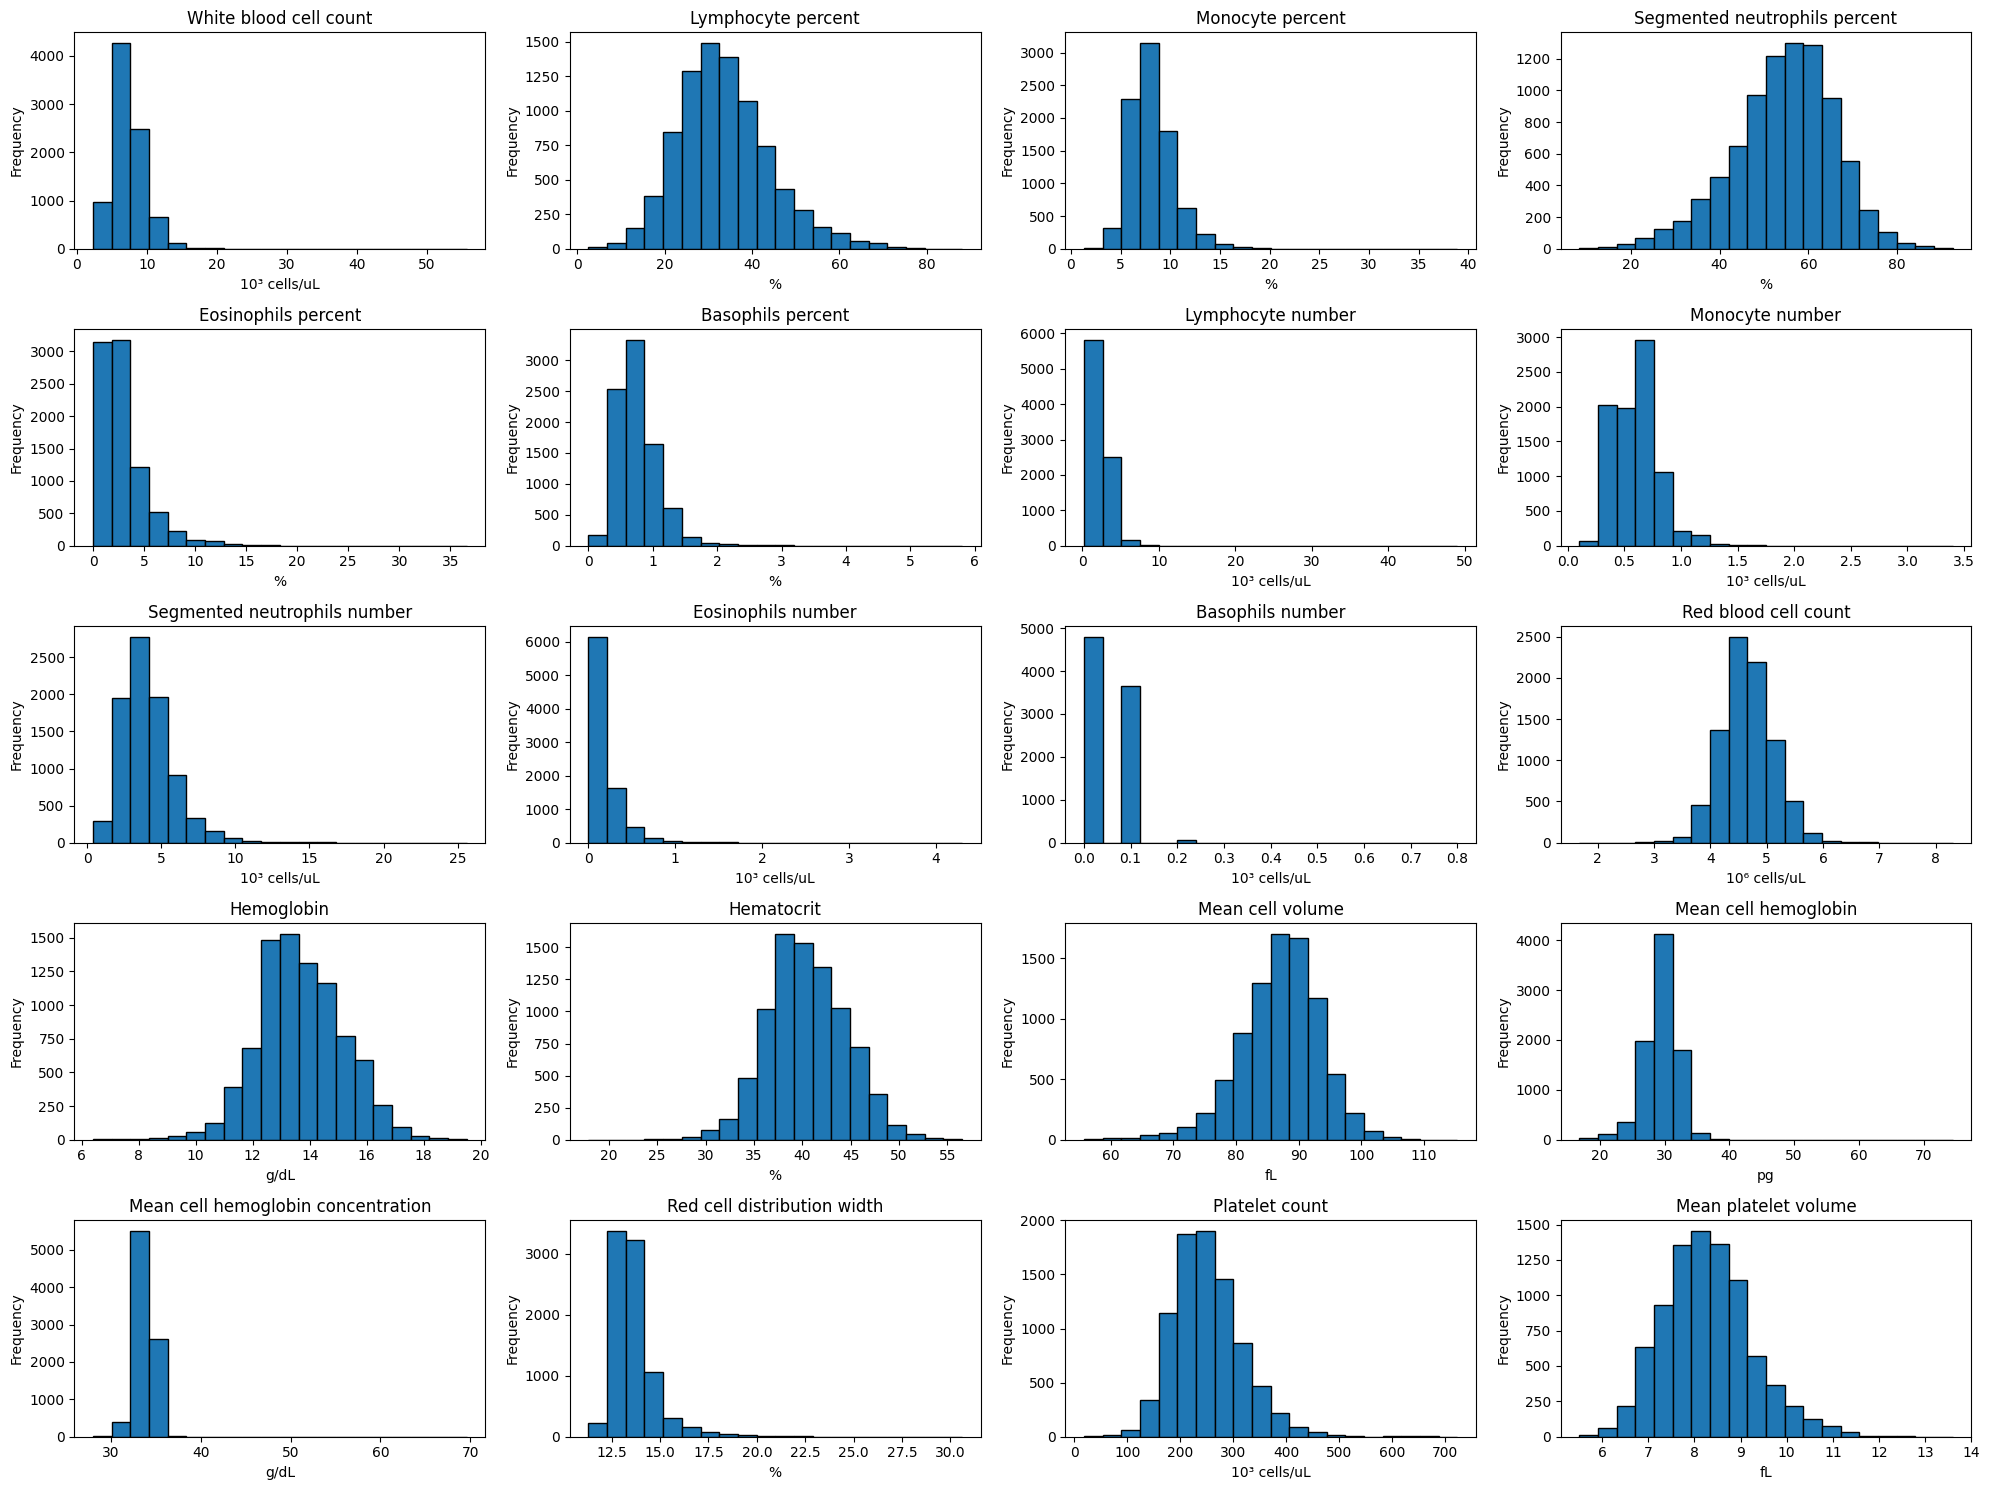

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

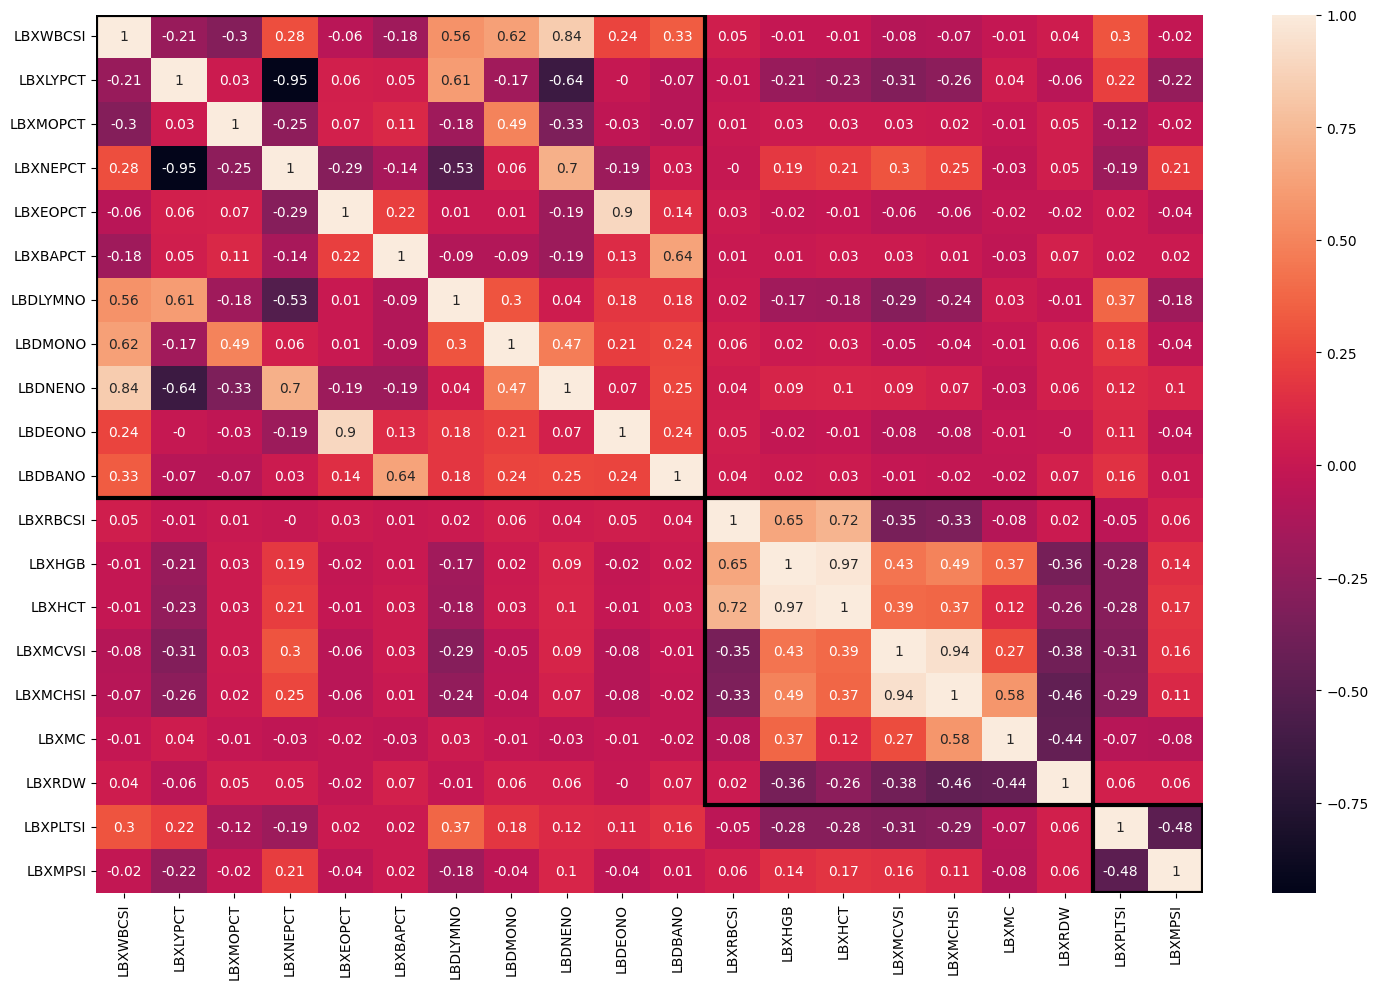

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2013-2014
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/BIOPRO_H.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [8]:
biopro = pd.read_sas('BIOPRO_H.xpt')
biopro.describe()

SEQN       LBXSAL     LBDSALSI     LBXSAPSI     LBXSASSI  \
count   6979.000000  6553.000000  6553.000000  6552.000000  6551.000000   
mean   78668.909299     4.282085    42.820845    78.578907    25.117845   
std     2924.003441     0.343649     3.436491    51.614841    17.740698   
min    73557.000000     2.400000    24.000000     9.000000     9.000000   
25%    76145.500000     4.100000    41.000000    53.000000    19.000000   
50%    78704.000000     4.300000    43.000000    66.000000    22.000000   
75%    81191.500000     4.500000    45.000000    83.000000    27.000000   
max    83729.000000     5.600000    56.000000   907.000000   882.000000   

          LBXSATSI       LBXSBU     LBDSBUSI     LBXSC3SI       LBXSCA  ...  \
count  6551.000000  6553.000000  6553.000000  6553.000000  6511.000000  ...   
mean     24.069913    12.863269     4.592582    25.168167     9.486377  ...   
std      18.484877     5.993834     2.139780     2.269895     0.367961  ...   
min       6.000000     1.000000     0.360000    16.000000     7.600000  ...   
25%      15.000000     9.000000     3.210000    24.000000     9.200000  ...   
50%      20.000000    12.000000     4.280000    25.000000     9.500000  ...   
75%      27.000000    15.000000     5.360000    27.000000     9.700000  ...   
max     536.000000    95.000000    33.920000    43.000000    14.800000  ...   

            LBXSPH     LBDSPHSI       LBXSTB     LBDSTBSI       LBXSTP  \
count  6552.000000  6552.000000  6549.000000  6549.000000  6544.000000   
mean      3.929405     1.268801     0.639235    10.930919     7.107928   
std       0.651231     0.210288     0.308691     5.278621     0.468175   
min       1.800000     0.581000     0.100000     1.710000     4.700000   
25%       3.500000     1.130000     0.400000     6.840000     6.800000   
50%       3.900000     1.259000     0.600000    10.260000     7.100000   
75%       4.300000     1.388000     0.800000    13.680000     7.400000   
max      10.900000     3.520000     7.100000   121.410000    10.200000   

          LBDSTPSI       LBXSTR     LBDSTRSI       LBXSUA     LBDSUASI  
count  6544.000000  6549.000000  6549.000000  6551.000000  6551.000000  
mean     71.079279   143.084288     1.615429     5.349855   318.209586  
std       4.681752   134.540026     1.518961     1.403767    83.495760  
min      47.000000    19.000000     0.215000     0.700000    41.600000  
25%      68.000000    72.000000     0.813000     4.300000   255.800000  
50%      71.000000   111.000000     1.253000     5.200000   309.300000  
75%      74.000000   175.000000     1.976000     6.200000   368.800000  
max     102.000000  6057.000000    68.384000    13.300000   791.100000  

[8 rows x 38 columns]

<Axes: >

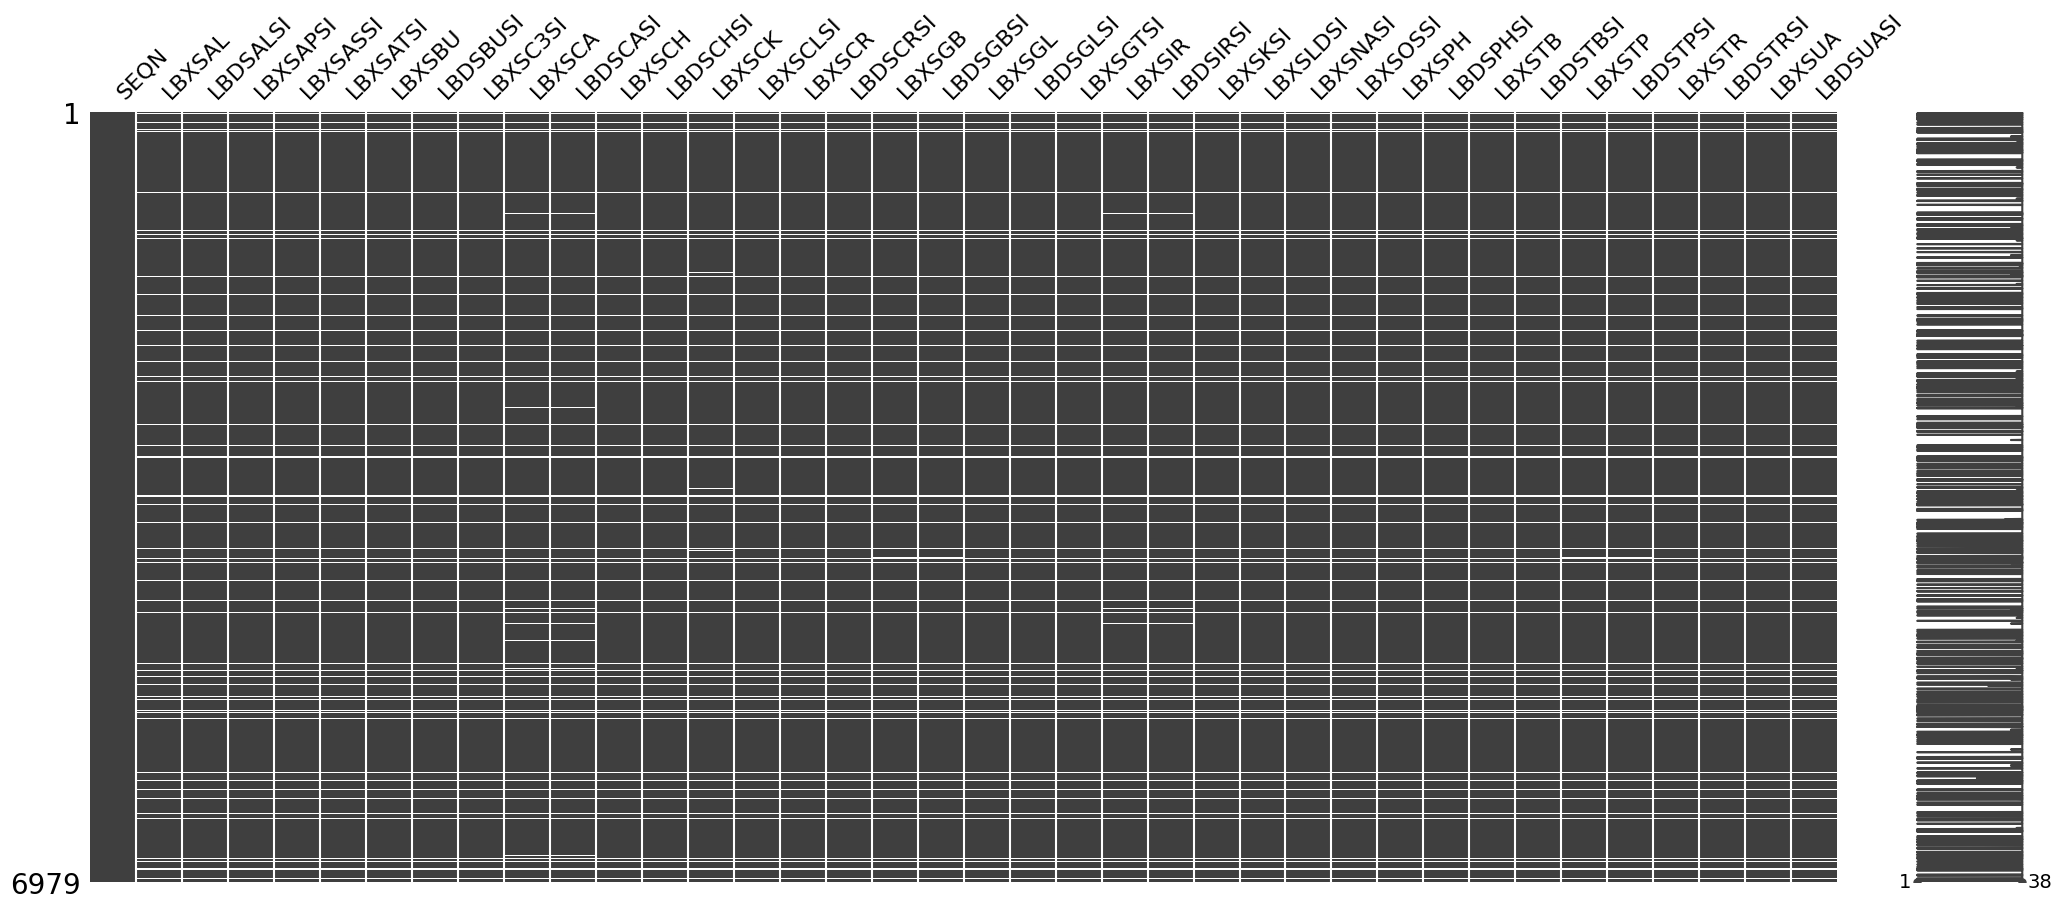

In [9]:
msno.matrix(biopro)

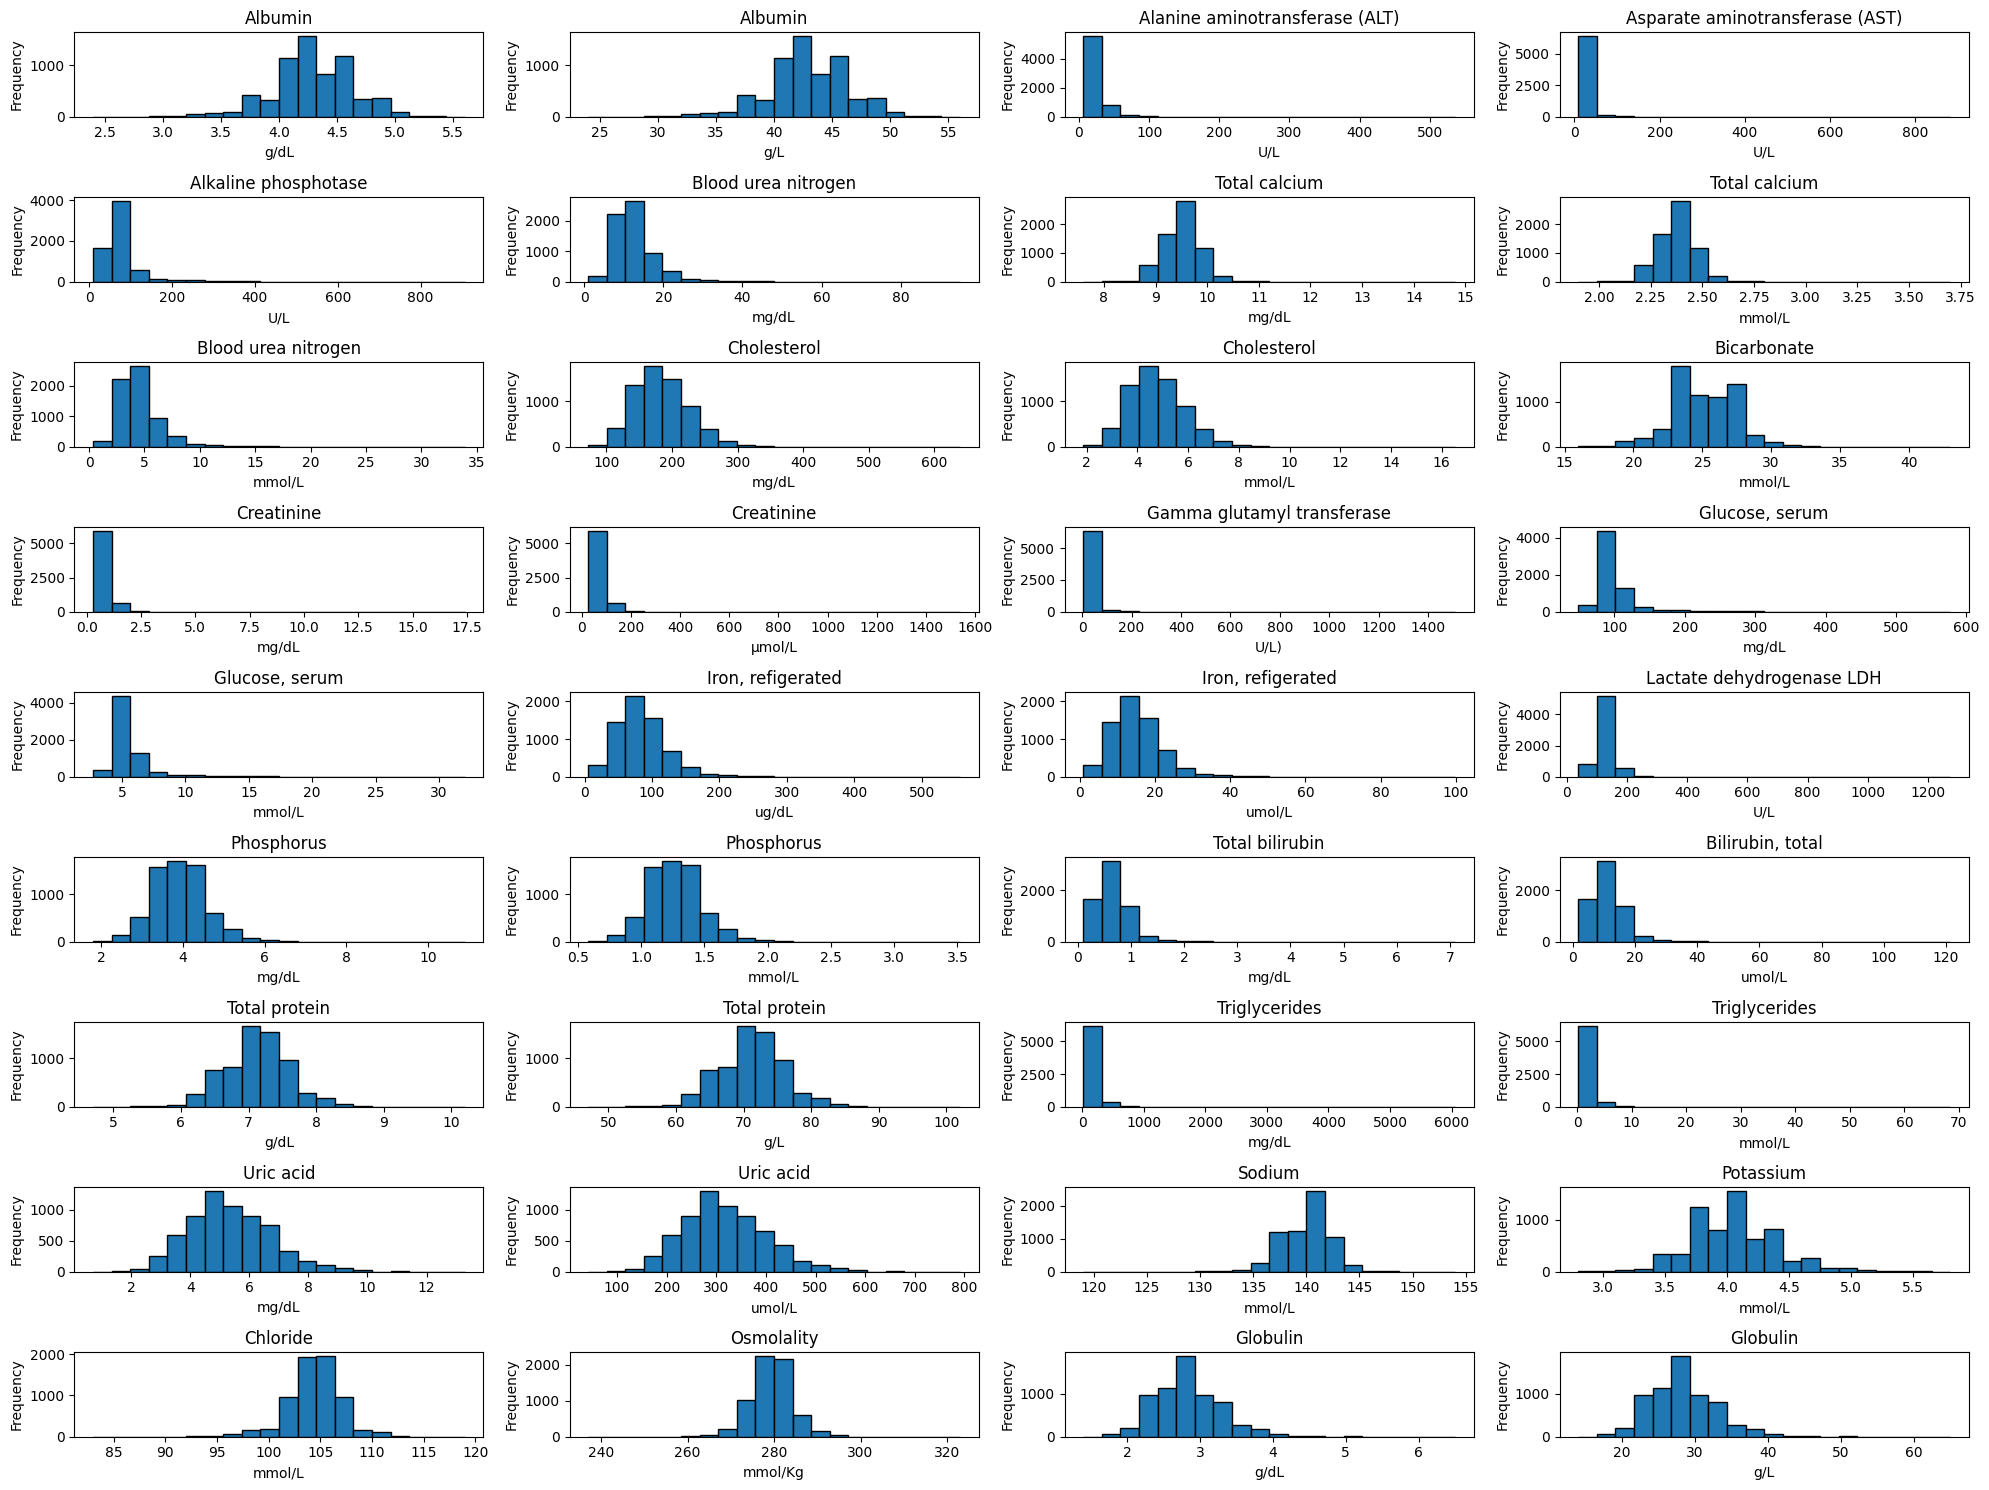

In [10]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()